In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

The following results correponds to SPDE where we remove  $\hat{z} \times \tilde{\mathbf{u}}$, $\nabla (\xi \cdot R)$ and replace $\nabla \cdot (\tilde{\mathbf{u}} \theta)$ with $\tilde{\mathbf{u}} \cdot \nabla \theta$ from SALT parameterised atmosphere .
We use CN scheme for time-discretisation of SPDE.

# Loading data for mesh with resolution $32$

In [3]:
data_t1 = np.load('../../../../deterministic/224x32/data_from_deterministic_run/coarse_grained_vel_temp_vort_data_t=27_to_t=36_grid_32_c=1by32_decor_t_80min.npz') # coarse grained high res. sol
data_t2 = np.load('../../../../deterministic/224x32/data_from_deterministic_run/coarse_grained_vel_temp_vort_data_t=36_to_t=45_grid_32_c=1by32_decor_t_80min.npz') # coarse grained high res. sol
data_d = np.load('../../../../deterministic/224x32/data_from_deterministic_run/coarse_grid_sim_vel_temp_vort_data_t=27_to_t=45_coarse_grained_ic.npz') # deterministic solution on coarse grid
data_adap = np.load('../../../../deterministic/224x32/data_from_deterministic_run/adaptive_sol_mesh_32_sim_vel_temp_data_t=27_to_t=45_coarse_grained_ic.npz') # adapted ref. solution. we remove \nabla (\xi. R) and replace \nabla. (u_pert \theta) with u_pert . \nabla \theta

In [4]:
vel_data_t1 = data_t1['vel_data_truth']
temp_data_t1 = data_t1['temp_data_truth']

vel_data_t2 = data_t2['vel_data_truth']
temp_data_t2 = data_t2['temp_data_truth']

vel_data_32_adap = data_adap['vel_data']
temp_data_32_adap = data_adap['temp_data']

In [5]:
gridpoints = data_t1['gridpoints']

In [6]:
vel_data_32_t = np.concatenate((vel_data_t1, vel_data_t2),axis=0)
vel_data_32_t.shape

(19, 9, 2)

In [7]:
temp_data_32_t = np.concatenate((temp_data_t1, temp_data_t2), axis=0)
temp_data_32_t.shape

(19, 9)

# Loading data for mesh with resolution $64$

In [8]:
data_t1 = np.load('../../../../deterministic/448x64/data_from_deterministic_run/coarse_grained_vel_temp_vort_data_t=27_to_t=30_grid_64_c=1by64_decor_t_16min.npz')
data_t2 = np.load('../../../../deterministic/448x64/data_from_deterministic_run/coarse_grained_vel_temp_vort_data_t=30_to_t=33_grid_64_c=1by64_decor_t_16min.npz')
data_t3 = np.load('../../../../deterministic/448x64/data_from_deterministic_run/coarse_grained_vel_temp_vort_data_t=33_to_t=36_grid_64_c=1by64_decor_t_16min.npz')
data_t4 = np.load('../../../../deterministic/448x64/data_from_deterministic_run/coarse_grained_vel_temp_vort_data_t=36_to_t=39_grid_64_c=1by64_decor_t_16min.npz')
data_t5 = np.load('../../../../deterministic/448x64/data_from_deterministic_run/coarse_grained_vel_temp_vort_data_t=39_to_t=42_grid_64_c=1by64_decor_t_16min.npz')
data_t6 = np.load('../../../../deterministic/448x64/data_from_deterministic_run/coarse_grained_vel_temp_vort_data_t=42_to_t=45_grid_64_c=1by64_decor_t_16min.npz')
data_d = np.load('../../../../deterministic/448x64/data_from_deterministic_run/coarse_grid_sim_vel_temp_vort_data_t=27.0_to_t=45.0.npz') # deterministic solution on coarse grid
data_adap = np.load('../../../../deterministic/448x64/data_from_deterministic_run/adaptive_sol_mesh_64_sim_vel_temp_vort_data_t=27_to_t=45_coarse_grained_ic.npz') # adapted ref. solution. we remove \nabla (\xi. R) and replace \nabla. (u_pert \theta) with u_pert . \nabla \theta

In [9]:
vel_data_t1 = data_t1['vel_data_truth']
temp_data_t1 = data_t1['temp_data_truth']

vel_data_t2 = data_t2['vel_data_truth']
temp_data_t2 = data_t2['temp_data_truth']

vel_data_t3 = data_t3['vel_data_truth']
temp_data_t3 = data_t3['temp_data_truth']

vel_data_t4 = data_t4['vel_data_truth']
temp_data_t4 = data_t4['temp_data_truth']

vel_data_t5 = data_t5['vel_data_truth']
temp_data_t5 = data_t5['temp_data_truth']

vel_data_t6 = data_t6['vel_data_truth']
temp_data_t6 = data_t6['temp_data_truth']

vel_data_64_adap = data_adap['vel_data']
temp_data_64_adap = data_adap['temp_data']

In [10]:
vel_data_64_t = np.concatenate((vel_data_t1, vel_data_t2,vel_data_t3, vel_data_t4,vel_data_t5, vel_data_t6),axis=0)
vel_data_64_t.shape

(19, 9, 2)

In [11]:
temp_data_64_t = np.concatenate((temp_data_t1, temp_data_t2,temp_data_t3, temp_data_t4,temp_data_t5, temp_data_t6), axis=0)
temp_data_64_t.shape

(19, 9)

# Calculating one standard deviation regions about mean 

Ensemble size: $50$, Variance level: $90 \%$

In [12]:
n_tsteps = 19 
n_obs_points = gridpoints.shape[0]
n_stoch_sim = 50

In [13]:
# calculating 1-std data for x-vel from all stochastic simulations at all points
vel_x_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_x_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_y_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim))
    for k in range(n_stoch_sim):
        data_stoch = np.load('../../data_from_stochastic_run/vel_temp_vort_data_particle_'+str(k+1)+'_var_90_grid_32_t27_onwards_upd_noise_OU.npz')
        vel_data_stoch = data_stoch['vel_data_sto']  
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_std_plus = vel_x_data_mean + vel_x_data_std
    vel_x_std_minus = vel_x_data_mean - vel_x_data_std

    vel_y_std_plus = vel_y_data_mean + vel_y_data_std
    vel_y_std_minus = vel_y_data_mean - vel_y_data_std

    vel_x_std_data_plus[:,l] = vel_x_std_plus[:,0]
    vel_x_std_data_minus[:,l] = vel_x_std_minus[:,0]
    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]

    vel_y_std_data_plus[:,l] = vel_y_std_plus[:,0]
    vel_y_std_data_minus[:,l] = vel_y_std_minus[:,0]
    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]

In [14]:
# results from resolution 32
vel_x_std_plus_p1 = vel_x_std_data_plus 
vel_x_std_minus_p1 = vel_x_std_data_minus
vel_x_mean_p1 = vel_x_mean_mat

vel_y_std_plus_p1 = vel_y_std_data_plus 
vel_y_std_minus_p1 = vel_y_std_data_minus
vel_y_mean_p1 = vel_y_mean_mat

In [15]:
# calculating 1-std data for x-vel from all stochastic simulations at all points
vel_x_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_x_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_y_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim))
    for k in range(n_stoch_sim):
        data_stoch = np.load('../../../448x64/data_from_stochastic_run/vel_temp_vort_data_particle_'+str(k+1)+'_var_90_grid_64_t27_onwards_OU.npz')
        vel_data_stoch = data_stoch['vel_data_sto']  
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_std_plus = vel_x_data_mean + vel_x_data_std
    vel_x_std_minus = vel_x_data_mean - vel_x_data_std

    vel_y_std_plus = vel_y_data_mean + vel_y_data_std
    vel_y_std_minus = vel_y_data_mean - vel_y_data_std

    vel_x_std_data_plus[:,l] = vel_x_std_plus[:,0]
    vel_x_std_data_minus[:,l] = vel_x_std_minus[:,0]
    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]

    vel_y_std_data_plus[:,l] = vel_y_std_plus[:,0]
    vel_y_std_data_minus[:,l] = vel_y_std_minus[:,0]
    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]

In [16]:
# results from resolution 64
vel_x_std_plus_p2 = vel_x_std_data_plus 
vel_x_std_minus_p2 = vel_x_std_data_minus
vel_x_mean_p2 = vel_x_mean_mat

vel_y_std_plus_p2 = vel_y_std_data_plus 
vel_y_std_minus_p2 = vel_y_std_data_minus
vel_y_mean_p2 = vel_y_mean_mat

[Text(0, 0.5, '\\bf {velocity} $x$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $x$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $x$ \\bf{component}')]

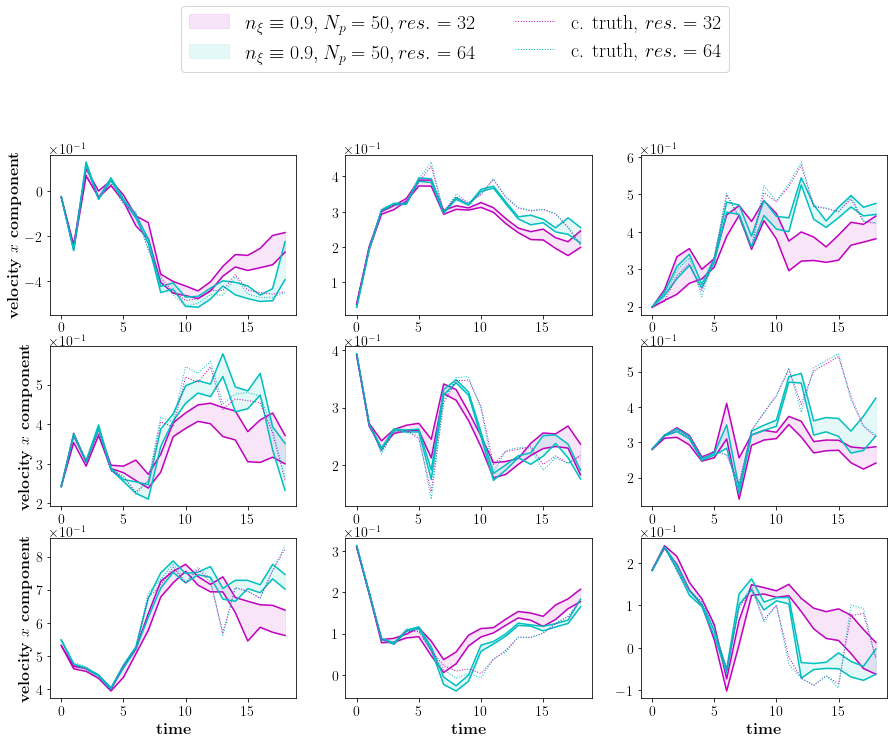

In [17]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(3,3, figsize=(15, 10))
n = 0
lime_c = '#00FF00' # this is neon green !
c1 = "m"
c2 = "c"
# c2 = lime_c
for i in [2,1,0]:
    for j in [0,1,2]:

        ax[i,j].plot(vel_x_std_plus_p1[sp:,n], color=c1)
        ax[i,j].plot(vel_x_std_minus_p1[sp:,n], color=c1)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_x_std_plus_p1[sp:,n],vel_x_std_minus_p1[sp:,n], alpha=.1, color=c1, label=r'$n_{\xi}\equiv 0.9 , N_p = 50, res. = 32$' )
        ax[i,j].plot(vel_x_std_plus_p2[sp:,n], color=c2)
        ax[i,j].plot(vel_x_std_minus_p2[sp:,n], color=c2)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_x_std_plus_p2[sp:,n],vel_x_std_minus_p2[sp:,n], alpha=.1, color=c2, label=r'$n_{\xi}\equiv 0.9 , N_p = 50, res. = 64$' )
        ax[i,j].plot(vel_data_32_t[sp:n_tsteps,n,0], linestyle='dotted', label = r'c. truth, $res. = 32$', color=c1, linewidth=1)
        ax[i,j].plot(vel_data_64_t[sp:n_tsteps,n,0], linestyle='dotted', label = r'c. truth, $res. = 64$', color=c2, linewidth=1)
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.setp(ax[:, 0], ylabel=r'\bf {velocity} $x$ \bf{component}')

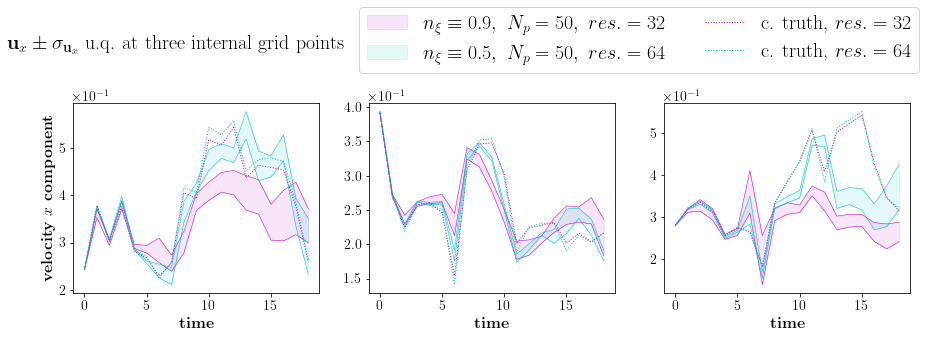

In [28]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(1,3, figsize=(15, 3.5))
n = 3 # we are plotting from the 4th gridpoint onwards
lime_c = '#00FF00' # this is neon green !
c1 = "m"
c2 = "c"
l1 = 1
l2 = 0.5
for j in [0,1,2]:
    ax[j].plot(vel_x_std_plus_p1[sp:,n], color=c1, linewidth=l2)
    ax[j].plot(vel_x_std_minus_p1[sp:,n], color=c1, linewidth=l2)
    ax[j].fill_between(np.arange(n_tsteps - sp),vel_x_std_plus_p1[sp:,n],vel_x_std_minus_p1[sp:,n], alpha=.1, color=c1, label=r'$n_{\xi}\equiv 0.9 , \ N_p = 50, \ res. = 32$' )

    ax[j].plot(vel_x_std_plus_p2[sp:,n], color=c2, linewidth=l2)
    ax[j].plot(vel_x_std_minus_p2[sp:,n], color=c2, linewidth=l2)
    ax[j].fill_between(np.arange(n_tsteps - sp),vel_x_std_plus_p2[sp:,n],vel_x_std_minus_p2[sp:,n], alpha=.1, color=c2, label=r'$n_{\xi}\equiv 0.5 , \ N_p = 50, \ res. = 64$' )

    ax[j].plot(vel_data_32_t[sp:n_tsteps,n,0], linestyle='dotted', label = r'c. truth, $res. = 32$', color=c1, linewidth=1)
    ax[j].plot(vel_data_64_t[sp:n_tsteps,n,0], linestyle='dotted', label = r'c. truth, $res. = 64$', color=c2, linewidth=1)
    ax[j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
    n += 1
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.38, 1.3), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'$\mathbf{u}_x \pm \sigma_{\mathbf{u}_x}$ u.q. at three internal grid points', x = 0.22, y = 1.15)
plt.setp(ax[:], xlabel=r'\bf {time}')
plt.setp(ax[0], ylabel=r'\bf {velocity} $x$ \bf{component}')
plt.savefig('../../plots/uncert_quant/uq_atmo_ux_diff_res_ou.pdf',bbox_inches='tight')

[Text(0, 0.5, '\\bf {velocity} $y$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $y$ \\bf{component}'),
 Text(0, 0.5, '\\bf {velocity} $y$ \\bf{component}')]

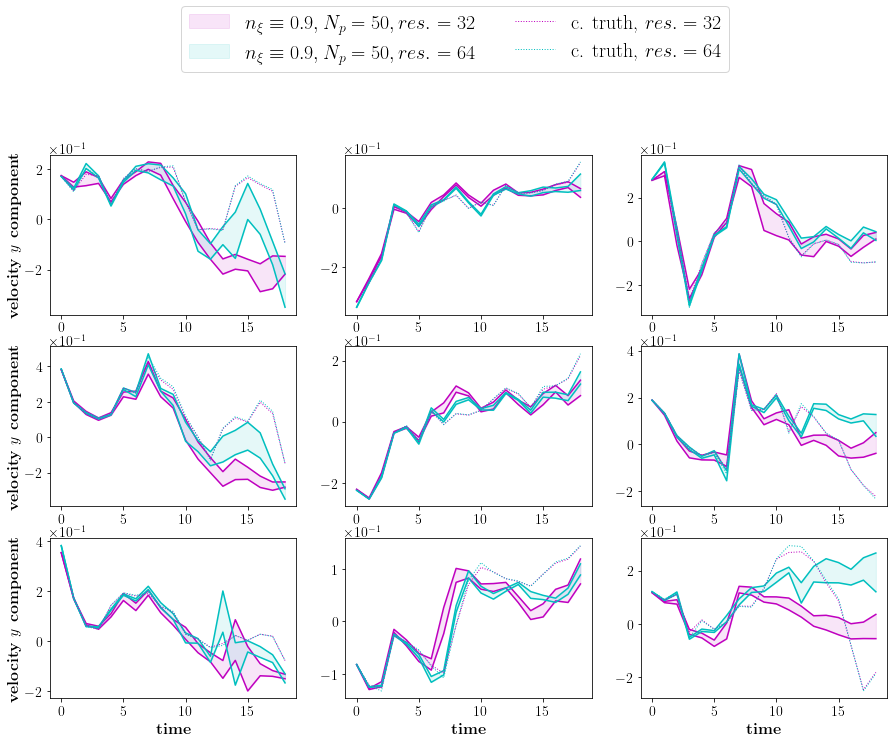

In [19]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(3,3, figsize=(15, 10))
n = 0
lime_c = '#00FF00' # this is neon green !
c1 = "m"
c2 = "c"
# c2 = lime_c
for i in [2,1,0]:
    for j in [0,1,2]:

        ax[i,j].plot(vel_y_std_plus_p1[sp:,n], color=c1)
        ax[i,j].plot(vel_y_std_minus_p1[sp:,n], color=c1)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_y_std_plus_p1[sp:,n],vel_y_std_minus_p1[sp:,n], alpha=.1, color=c1, label=r'$n_{\xi}\equiv 0.9 , N_p = 50, res. = 32$' )
        ax[i,j].plot(vel_y_std_plus_p2[sp:,n], color=c2)
        ax[i,j].plot(vel_y_std_minus_p2[sp:,n], color=c2)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_y_std_plus_p2[sp:,n],vel_y_std_minus_p2[sp:,n], alpha=.1, color=c2, label=r'$n_{\xi}\equiv 0.9 , N_p = 50, res. = 64$' )
        ax[i,j].plot(vel_data_32_t[sp:n_tsteps,n,1], linestyle='dotted', label = r'c. truth, $res. = 32$', color=c1, linewidth=1)
        ax[i,j].plot(vel_data_64_t[sp:n_tsteps,n,1], linestyle='dotted', label = r'c. truth, $res. = 64$', color=c2, linewidth=1)
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.setp(ax[:, 0], ylabel=r'\bf {velocity} $y$ \bf{component}')

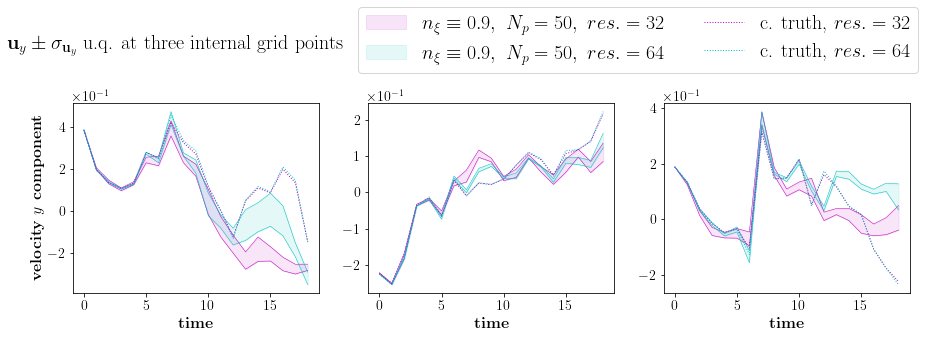

In [20]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(1,3, figsize=(15, 3.5))
n = 3 # we are plotting from the 4th gridpoint onwards
lime_c = '#00FF00' # this is neon green !
c1 = "m"
c2 = "c"
l1 = 1
l2 = 0.5
for j in [0,1,2]:
    ax[j].plot(vel_y_std_plus_p1[sp:,n], color=c1, linewidth=l2)
    ax[j].plot(vel_y_std_minus_p1[sp:,n], color=c1, linewidth=l2)
    ax[j].fill_between(np.arange(n_tsteps - sp),vel_y_std_plus_p1[sp:,n],vel_y_std_minus_p1[sp:,n], alpha=.1, color=c1, label=r'$n_{\xi}\equiv 0.9 , \ N_p = 50, \ res. = 32$' )

    ax[j].plot(vel_y_std_plus_p2[sp:,n], color=c2, linewidth=l2)
    ax[j].plot(vel_y_std_minus_p2[sp:,n], color=c2, linewidth=l2)
    ax[j].fill_between(np.arange(n_tsteps - sp),vel_y_std_plus_p2[sp:,n],vel_y_std_minus_p2[sp:,n], alpha=.1, color=c2, label=r'$n_{\xi}\equiv 0.9 , \ N_p = 50, \ res. = 64$' )

    ax[j].plot(vel_data_32_t[sp:n_tsteps,n,1], linestyle='dotted', label = r'c. truth, $res. = 32$', color=c1, linewidth=1)
    ax[j].plot(vel_data_64_t[sp:n_tsteps,n,1], linestyle='dotted', label = r'c. truth, $res. = 64$', color=c2, linewidth=1)
    ax[j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
    n += 1
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.38, 1.3), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'$\mathbf{u}_y \pm \sigma_{\mathbf{u}_y}$ u.q. at three internal grid points', x = 0.22, y = 1.15)
plt.setp(ax[:], xlabel=r'\bf {time}')
plt.setp(ax[0], ylabel=r'\bf {velocity} $y$ \bf{component}')
plt.savefig('../../plots/uncert_quant/uq_atmo_uy_diff_res_ou.pdf',bbox_inches='tight')

In [21]:
# calculating 1-std data for temperature from all stochastic simulations at all points
temp_std_data_plus = np.zeros((n_tsteps,n_obs_points))
temp_std_data_minus = np.zeros((n_tsteps,n_obs_points))
temp_data_mean_mat = np.zeros((n_tsteps,n_obs_points))
for l in range(n_obs_points):
    temp_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim)) # at a location
    for k in range(n_stoch_sim):
        data_stoch = np.load('../../data_from_stochastic_run/vel_temp_vort_data_particle_'+str(k+1)+'_var_90_grid_32_t27_onwards_upd_noise_OU.npz')
        temp_data_stoch = data_stoch['temp_data_sto'] 
        temp_data_stoch_mat[:,k] = temp_data_stoch[:n_tsteps,l]
    temp_data_mean = np.mean(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_data_std = np.std(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_std_plus = temp_data_mean + temp_data_std
    temp_std_minus = temp_data_mean - temp_data_std
    temp_std_data_plus[:,l] = temp_std_plus[:,0]
    temp_std_data_minus[:,l] = temp_std_minus[:,0]
    temp_data_mean_mat[:,l] = temp_data_mean[:,0]

In [22]:
# 90 % variance
temp_std_plus_p1 = temp_std_data_plus
temp_std_minus_p1 = temp_std_data_minus
temp_mean_p1 = temp_data_mean_mat

In [23]:
# calculating 1-std data for temperature from all stochastic simulations at all points
temp_std_data_plus = np.zeros((n_tsteps,n_obs_points))
temp_std_data_minus = np.zeros((n_tsteps,n_obs_points))
temp_data_mean_mat = np.zeros((n_tsteps,n_obs_points))
for l in range(n_obs_points):
    temp_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim)) # at a location
    for k in range(n_stoch_sim):
        data_stoch = np.load('../../../448x64/data_from_stochastic_run/vel_temp_vort_data_particle_'+str(k+1)+'_var_90_grid_64_t27_onwards_OU.npz')
        temp_data_stoch = data_stoch['temp_data_sto'] 
        temp_data_stoch_mat[:,k] = temp_data_stoch[:n_tsteps,l]
    temp_data_mean = np.mean(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_data_std = np.std(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_std_plus = temp_data_mean + temp_data_std
    temp_std_minus = temp_data_mean - temp_data_std
    temp_std_data_plus[:,l] = temp_std_plus[:,0]
    temp_std_data_minus[:,l] = temp_std_minus[:,0]
    temp_data_mean_mat[:,l] = temp_data_mean[:,0]

In [24]:
# 70 % variance
temp_std_plus_p2 = temp_std_data_plus
temp_std_minus_p2 = temp_std_data_minus
temp_mean_50p_p2 = temp_data_mean_mat

[Text(0, 0.5, '${ \\bf temperature }$'),
 Text(0, 0.5, '${ \\bf temperature }$'),
 Text(0, 0.5, '${ \\bf temperature }$')]

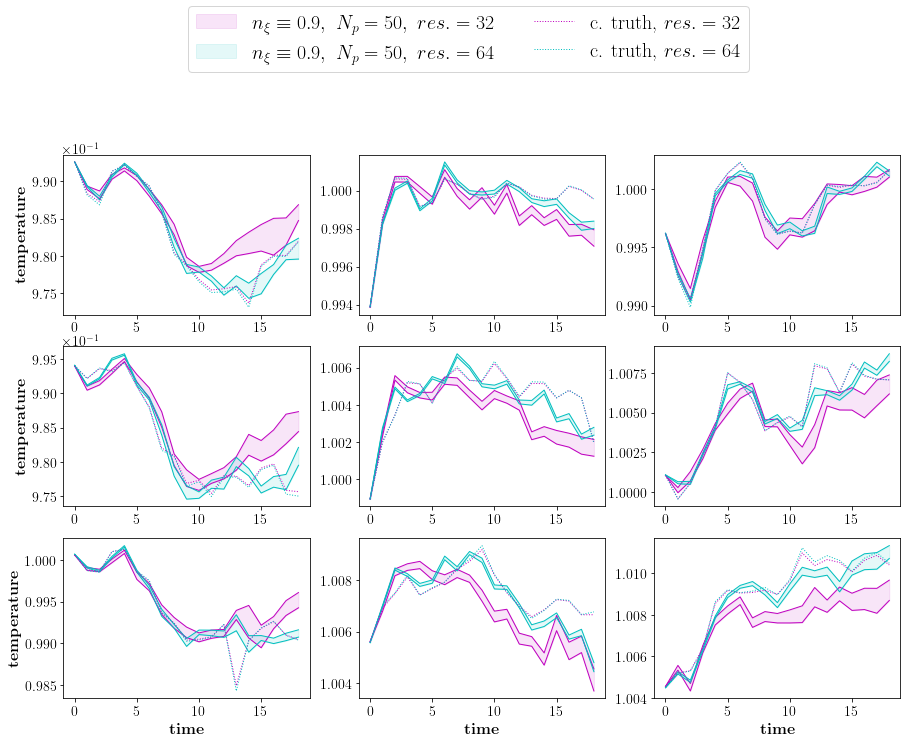

In [25]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(3,3, figsize=(15,10))
n = 0
c1 = "m"
c2 = "c"
for i in [2,1,0]:
    for j in [0,1,2]:
        # ax[i,j].plot(temp_data_d[sp:n_tsteps,n], label = 'deterministic', linewidth=1, color=lime_c)
        ax[i,j].plot(temp_std_plus_p1[sp:,n], color=c1, linewidth=1)
        ax[i,j].plot(temp_std_minus_p1[sp:,n], color=c1, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps -sp),temp_std_plus_p1[sp:,n],temp_std_minus_p1[sp:,n], alpha=.1, color=c1, label=r'$n_{\xi}\equiv 0.9, \ N_p = 50, \ res. = 32$' )
        ax[i,j].plot(temp_std_plus_p2[sp:,n], color=c2, linewidth=1)
        ax[i,j].plot(temp_std_minus_p2[sp:,n], color=c2, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps -sp),temp_std_plus_p2[sp:,n],temp_std_minus_p2[sp:,n], alpha=.1, color=c2, label=r'$n_{\xi}\equiv 0.9, \ N_p = 50, \ res. = 64$' )

        ax[i,j].plot(temp_data_32_t[sp:n_tsteps,n], linestyle='dotted', label = r'c. truth, $res. = 32$', color=c1, linewidth=1)
        ax[i,j].plot(temp_data_64_t[sp:n_tsteps,n], linestyle='dotted', label = r'c. truth, $res. = 64$', color=c2, linewidth=1)
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        # print((i,j, n))
        # ax[i,j].legend()
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
# set labels
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.setp(ax[:, 0], ylabel=r'${ \bf temperature }$')

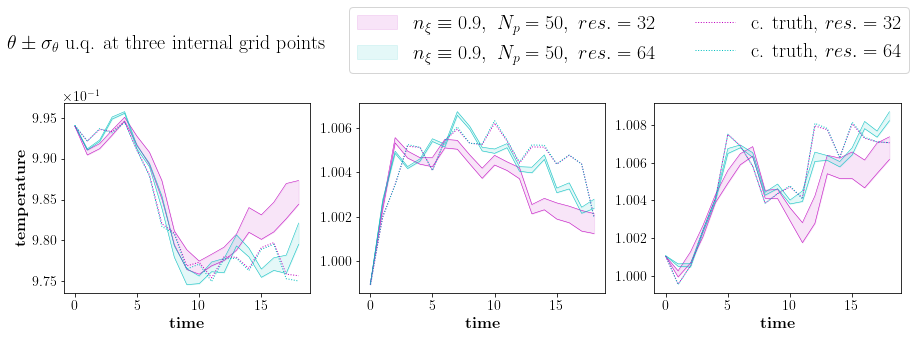

In [27]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(1,3, figsize=(15, 3.5))
n = 3 # we are plotting from the 4th gridpoint onwards
lime_c = '#00FF00' # this is neon green !
c1 = "m"
c2 = "c"
l1 = 1
l2 = 0.5
for j in [0,1,2]:
    ax[j].plot(temp_std_plus_p1[sp:,n], color=c1, linewidth=l2)
    ax[j].plot(temp_std_minus_p1[sp:,n], color=c1, linewidth=l2)
    ax[j].fill_between(np.arange(n_tsteps - sp),temp_std_plus_p1[sp:,n],temp_std_minus_p1[sp:,n], alpha=.1, color=c1, label=r'$n_{\xi}\equiv 0.9 , \ N_p = 50, \ res. = 32$' )

    ax[j].plot(temp_std_plus_p2[sp:,n], color=c2, linewidth=l2)
    ax[j].plot(temp_std_minus_p2[sp:,n], color=c2, linewidth=l2)
    ax[j].fill_between(np.arange(n_tsteps - sp),temp_std_plus_p2[sp:,n],temp_std_minus_p2[sp:,n], alpha=.1, color=c2, label=r'$n_{\xi}\equiv 0.9 , \ N_p = 50, \ res. = 64$' )

    ax[j].plot(temp_data_32_t[sp:n_tsteps,n], linestyle='dotted', label = r'c. truth, $res. = 32$', linewidth=1, color=c1)
    ax[j].plot(temp_data_64_t[sp:n_tsteps,n], linestyle='dotted', label = r'c. truth, $res. = 64$', linewidth=1, color=c2)
    ax[j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
    n += 1
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.38, 1.3), ncol=2) # positions the legend above the top of the plot without overlapping. 
fig.suptitle(r'$\theta \pm \sigma_{\theta}$ u.q. at three internal grid points', x = 0.22, y = 1.15)
plt.setp(ax[:], xlabel=r'\bf {time}')
plt.setp(ax[0], ylabel=r'\bf {temperature}')
plt.savefig('../../plots/uncert_quant/uq_atmo_temp_diff_res_ou.pdf',bbox_inches='tight')